In [13]:
import numpy as np
import pymc3 as pm
import arviz as ar

In [15]:
with pm.Model() as model:
    logx = pm.Normal('mi_log_x', mu=0, sigma=1.0)
    pm.Deterministic('mi_x', np.exp(logx))

In [20]:
sample = pm.sample(model=model, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mi_log_x]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.8834245937653988, but should be close to 0.8. Try to increase the number of tuning steps.


In [24]:
ar.summary(sample)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/rodrigo/code/mambaforge/envs/sophie-tess/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mi_log_x,0.008,1.016,-1.863,1.934,0.035,0.025,853.0,1386.0,1.0
mi_x,1.706,2.261,0.034,4.988,0.071,0.050,853.0,1386.0,1.0


In [25]:
type(sample)

pymc3.backends.base.MultiTrace

In [34]:
pl.thist(sample.get_values('mi_x')

array([4.71418449, 2.59756037, 0.447727  , ..., 4.64981936, 4.64981936,
       0.11046811])

(array([219., 318., 302., 229., 159., 135., 107.,  74.,  61.,  52.,  45.,
         29.,  36.,  21.,  23.,  17.,  16.,  27.,  11.,  10.,  12.,  10.,
          4.,   8.,   6.,   2.,   5.,   5.,   1.,   6.,   4.,   2.,   3.,
          3.,   3.,   2.,   0.,   4.,   1.,   1.,   3.,   1.,   2.,   0.,
          1.,   3.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.53740869e-02, 2.86536181e-01, 5.47698274e-01, 8.08860368e-01,
        1.07002246e+00, 1.33118456e+00, 1.59234665e+00, 1.85350874e+00,
        2.11467084e+00, 2.37583293e+00, 2.63699502e+00, 2.89815712e+00,
        3.15931921e+00, 3.42048130e+00, 3.68164340e+00, 3.94280549e+00,
        4.20396759e+00, 4.4651

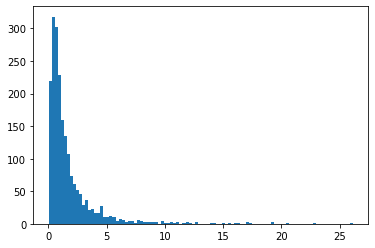

In [36]:
import matplotlib.pyplot as plt
plt.hist(sample.get_values('mi_x'), 100)